# MILESTONE 4: LINEAR PROBLEMS. REGIONS OF ABSOLUTE STABILITY

Ahora se integrará el oscilador lineal $\ddot{x}+x=0$, con las condiones iniciales de $x(0)$ =1; $\dot{x}(0)=0$

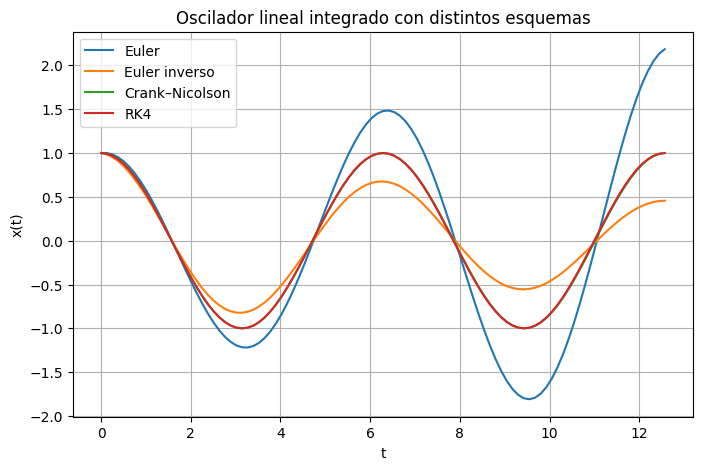

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from temporal_schemes import (step_euler, step_inverse_euler, step_crank_nicholson, step_rk4, Leap_Frog,)

def f_oscilador (U, t):
    x, v =U
    return np.array([v, -x])

def integrate(temporal_scheme, F, U0, T, N):

    dt=T/N
    t = np.linspace(0, T, N+1)
    U = np.zeros((N+1, len(U0)))
    U[0,:]=U0

    for n in range(N):
        U[n+1, :] = temporal_scheme(F, U[n,:], t[n], dt)

    return t, U



U0 = np.array([1, 0])
T = 4*np.pi
N = 100

t_eu,  U_eu  = integrate(step_euler, f_oscilador, U0, T, N)
t_ie,  U_ie  = integrate(step_inverse_euler, f_oscilador, U0, T, N)
t_cn,  U_cn  = integrate(step_crank_nicholson, f_oscilador, U0, T, N)
t_rk4, U_rk4 = integrate(step_rk4, f_oscilador, U0, T, N)




plt.figure(figsize=(8,5))
plt.plot(t_eu,  U_eu[:,0],  label="Euler")
plt.plot(t_ie,  U_ie[:,0],  label="Euler inverso")
plt.plot(t_cn,  U_cn[:,0],  label="Crank–Nicolson")
plt.plot(t_rk4, U_rk4[:,0], label="RK4")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Oscilador lineal integrado con distintos esquemas")
plt.legend()
plt.grid(True)
plt.show()
